<a href="https://colab.research.google.com/github/AbyssGazer-Oliver/Machine-Learning/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
fn_src ='https://drive.google.com/uc?export=download&id=1RzQpKONOcXSMxH2ZzOI4iVMiTgD6ttSl'
fn_dst ='eeg_dat.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    print('Fetching file %s [53MB].  This may take a minute..' % fn_dst)
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File eeg_dat.p is already downloaded


In [ ]:
import pickle
fn = 'eeg_dat.p'
with open(fn, 'rb') as fp:
    [X,Y] = pickle.load(fp)

In [ ]:
# TODO 1
nt =Y.shape[1]
ncur =X.shape[1]
nchan =Y.shape[0]
nvoxels =ncur/3

In [ ]:
# TODO 2
Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.33) 

In [ ]:
# TODO 3
# , copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001
regr = Ridge(alpha=1.0)

In [ ]:
# TODO 4
regr.fit(Xtr,Ytr)
Ytrhat=regr.predict(Xtr)
Ytshat=regr.predict(Xts)
rsq_tr = r2_score(Ytr,Ytrhat)
rsq_ts = r2_score(Yts,Ytshat)
print(rsq_tr)
print(rsq_ts)

0.605997283864357
0.17137045221201824


In [ ]:
# TODO 5
alphas=np.logspace(-2,2,20)
r2tr=[]
r2ts=[]
for alpha in alphas:
  regr=Ridge(alpha=alpha)
  regr.fit(Xtr,Ytr)
  Ytrhat=regr.predict(Xtr)
  Ytshat=regr.predict(Xts)
  rsq_tr = r2_score(Ytr,Ytrhat)
  rsq_ts = r2_score(Yts,Ytshat)
  r2tr.append(rsq_tr)
  r2ts.append(rsq_ts)
r2tr=np.array(r2tr)
r2ts=np.array(r2ts)

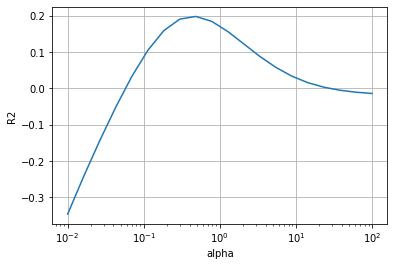

optimal R^2= 0.19773607867995027


In [ ]:
# TODO 6
plt.semilogx(alphas,r2ts,linestyle='solid')
plt.xlabel("alpha")
plt.ylabel("R2")
plt.grid()
plt.show()
print("optimal R^2=",np.max(r2ts))

[0.21681906 0.09511605 0.12017257 ... 0.09274939 0.06972805 0.05843275]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

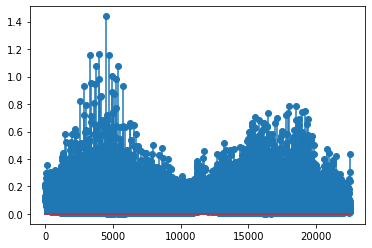

In [ ]:
# TODO 7
alpha_opt=alphas[np.argmax(r2ts)]
regr=Ridge(alpha=alpha_opt)
regr.fit(Xtr,Ytr)
W=regr.coef_
Wrms=np.sqrt(np.sum(W**2,axis=0))
print(Wrms)
plt.stem(Wrms)

In [ ]:
# TODO 8
regr2=Lasso(alpha=1e-3,max_iter=100,tol=0.01)
regr2.fit(Xtr,Ytr)

Lasso(alpha=0.001, max_iter=100, tol=0.01)

In [ ]:
# TODO 9
Ytshat=regr2.predict(Xts)
rsq_ts = r2_score(Yts,Ytshat)
print(rsq_ts)

0.14865291247248064


In [ ]:
# TODO 10
alphas=np.logspace(-4,-3,5)
W=[]
r2ts=[]
for alpha in alphas:
  regr2=Lasso(alpha=alpha,max_iter=100,tol=0.01)
  regr2.fit(Xtr,Ytr)
  Ytshat=regr2.predict(Xts)
  rsq_ts=r2_score(Yts,Ytshat)
  r2ts.append(rsq_ts)
  W.append(regr2.coef_)
r2ts=np.array(r2ts)

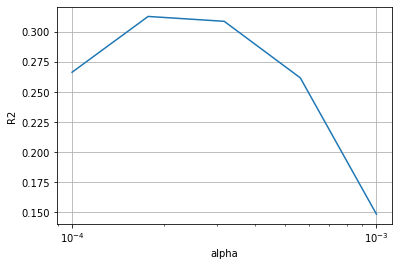

optimal R^2= 0.312647785159508


In [ ]:
# TODO 11
plt.semilogx(alphas,r2ts,linestyle='solid')
plt.xlabel("alpha")
plt.ylabel("R2")
plt.grid()
plt.show()
print("optimal R^2=",np.max(r2ts))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

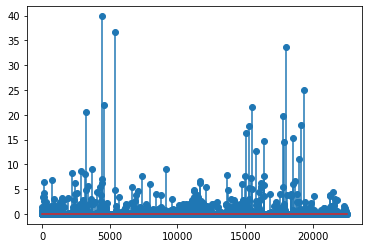

In [ ]:
# TODO 12
W_opt=W[np.argmax(r2ts)]
Wrms=np.sqrt(np.sum(W_opt**2,axis=0))
plt.stem(Wrms)